In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget https://projet.liris.cnrs.fr/geode/EDdA-Classification/datasets/EDdA_dataframe_withContent.tsv


--2022-03-31 12:36:46--  https://projet.liris.cnrs.fr/geode/EDdA-Classification/datasets/EDdA_dataframe_withContent.tsv
Resolving projet.liris.cnrs.fr (projet.liris.cnrs.fr)... 134.214.142.28
Connecting to projet.liris.cnrs.fr (projet.liris.cnrs.fr)|134.214.142.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 270305563 (258M) [text/tab-separated-values]
Saving to: ‘EDdA_dataframe_withContent.tsv’

EDdA_dataframe_with 100%[===================>] 257.78M  4.18MB/s    in 41s     

2022-03-31 12:37:28 (6.22 MB/s) - ‘EDdA_dataframe_withContent.tsv’ saved [270305563/270305563]



In [4]:
df = pd.read_csv("EDdA_dataframe_withContent.tsv", sep="\t")

df.shape

(74190, 13)

In [5]:
df.dropna(subset = ["contentWithoutClass", "ensemble_domaine_enccre"], inplace= True)
df.shape

(61362, 13)

In [6]:
df.columns

Index(['volume', 'numero', 'head', 'normClass', 'classEDdA', 'author',
       'id_enccre', 'domaine_enccre', 'ensemble_domaine_enccre', 'content',
       'contentWithoutClass', 'firstParagraph', 'nb_words'],
      dtype='object')

In [7]:
df2 = df.groupby(['ensemble_domaine_enccre']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

In [8]:
df2.at[df2[df2['ensemble_domaine_enccre'] == "Physique - [Sciences physico-mathématiques]"].index.values.astype(int)[0],'ensemble_domaine_enccre'] = "Physique [...]"
df2.at[df2[df2['ensemble_domaine_enccre'] == "Agriculture - Economie rustique"].index.values.astype(int)[0],'ensemble_domaine_enccre'] = "Agriculture [...]"
df2.at[df2[df2['ensemble_domaine_enccre'] == "Militaire (Art) - Guerre - Arme"].index.values.astype(int)[0],'ensemble_domaine_enccre'] = "Militaire [...]"


In [9]:
df2

ensemble_domaine_enccre  counts
15               Géographie   13289
12    Droit - Jurisprudence    6901
29                  Métiers    5434
17       Histoire naturelle    5405
16                 Histoire    3164
28     Médecine - Chirurgie    2452
14                Grammaire    2390
19                   Marine    2346
11                 Commerce    1924
35                 Religion    1675
3              Architecture    1454
2                 Antiquité    1393
32           Physique [...]    1391
23          Militaire [...]    1320
0         Agriculture [...]    1260
1                  Anatomie    1152
6   Belles-lettres - Poésie    1042
21            Mathématiques     729
26                  Musique     705
9                    Chasse     605
10                   Chimie     586
4           Arts et métiers     574
20       Maréchage - Manège     553
7                    Blason     549
31              Philosophie     490
5                Beaux-arts     447
30                Pharmacie     342
25                  Monnaie     326
18                      Jeu     289
34                    Pêche     217
22                   Mesure     189
13      Economie domestique     139
33                Politique     119
27                Médailles     118
8                Caractères     115
37             Superstition     115
24              Minéralogie     112
36                Spectacle      51

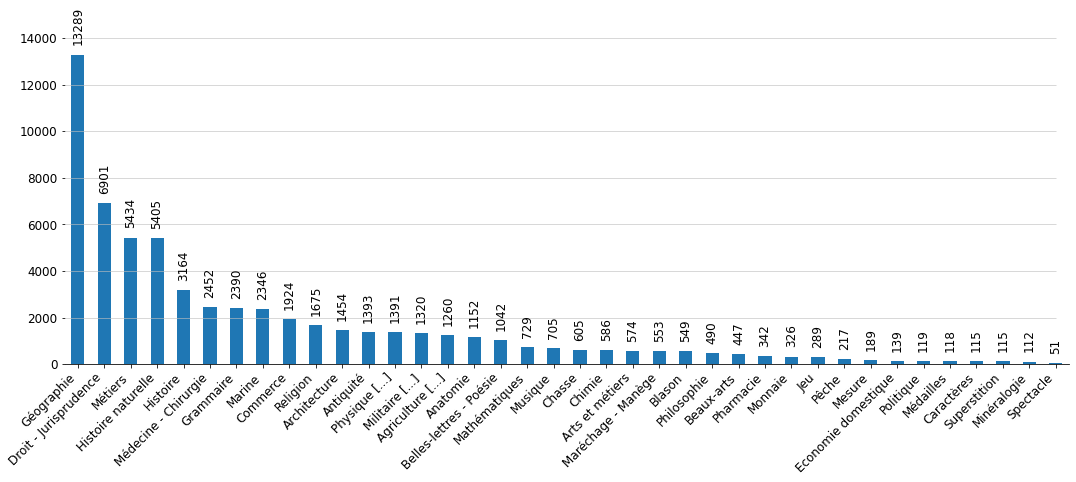

In [12]:

fig, ax = plt.subplots(figsize = (18, 6))
#ax = df2.plot.bar(x='ensemble_domaine_enccre', y='counts', rot=45)
ax.hlines(y=np.arange(0, 16000, 2000), xmin=-1, xmax=37, color="#bfbfbf", lw=0.6)

ax.set_xlim(-0.5, 37.5)
ax.set_ylim(0, 14000)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
bars = ax.bar(df2.ensemble_domaine_enccre, df2.counts, width=0.5)
for bar in bars : 
  height = bar.get_height()
  ax.text(bar.get_x() + bar.get_width()/2., height + 400,
                '%d' % int(height), ha='center', va='bottom', fontsize=12, rotation=90)

plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
fig.savefig('graphique_ensemble_domaine.png', bbox_inches = 'tight', dpi=150)